In [4]:
total_annual_sales = data.groupby('Year')['annual_sales'].sum()
annual_purchase_rate = total_annual_sales.pct_change()

regional_annual_sales = data.groupby(['Territory', 'Year'])['annual_sales'].sum().unstack()
regional_purchase_rate = regional_annual_sales.pct_change(axis=1)

print("Annual Purchase Rate:")
print(annual_purchase_rate)
print("\nPurchase Rate for Each Region:")
print(regional_purchase_rate)


Annual Purchase Rate:
Year
2018         NaN
2019    0.550109
2020   -0.064779
2021    0.207524
2022    0.344395
2023    0.052770
2024   -0.474853
Name: annual_sales, dtype: float64

Purchase Rate for Each Region:
Year           2018      2019      2020       2021      2022      2023  \
Territory                                                                
Central         NaN  0.894343 -0.127232   0.029190  0.278531  0.101764   
International   NaN -0.257826  0.151250   5.215206 -0.496252  1.661701   
Midwest         NaN  0.347424  0.111126  -0.393084  1.327628 -0.397091   
Northeast       NaN  0.335544 -0.011132   0.094718  0.814359  0.098841   
South           NaN  0.410335 -0.001284   0.159983  0.678309  0.013458   
Special         NaN       NaN       NaN        NaN -0.662891  4.227013   
Unknown         NaN -0.120212 -0.104130  74.779363 -0.758503  0.325302   
West            NaN  0.759805 -0.218213   0.288029  0.062764  0.373635   

Year               2024  
Territory           

/var/folders/sg/qzv2ht5n005_wc213wfx60000000gn/T/ipykernel_94586/2783842310.py:7: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  regional_purchase_rate = regional_annual_sales.pct_change(axis=1)


/var/folders/sg/qzv2ht5n005_wc213wfx60000000gn/T/ipykernel_94586/14717539.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  regional_purchase_rate = regional_annual_sales.pct_change(axis=1)


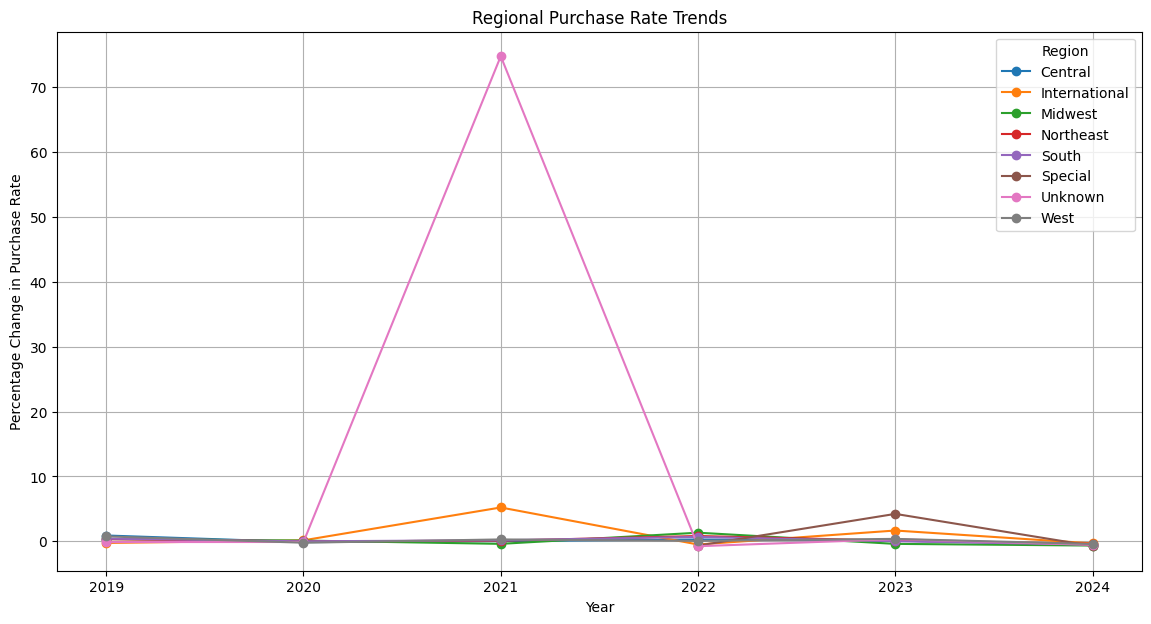

In [5]:

regional_annual_sales = data.groupby(['Territory', 'Year'])['annual_sales'].sum().unstack()
regional_purchase_rate = regional_annual_sales.pct_change(axis=1)

plt.figure(figsize=(14, 7))
for region in regional_purchase_rate.index:
    plt.plot(regional_purchase_rate.columns, regional_purchase_rate.loc[region], marker='o', label=region)

plt.title('Regional Purchase Rate Trends')
plt.xlabel('Year')
plt.ylabel('Percentage Change in Purchase Rate')
plt.legend(title='Region')
plt.grid(True)
plt.show()


AttributeError: 'Axes' object has no attribute 'set_xl'

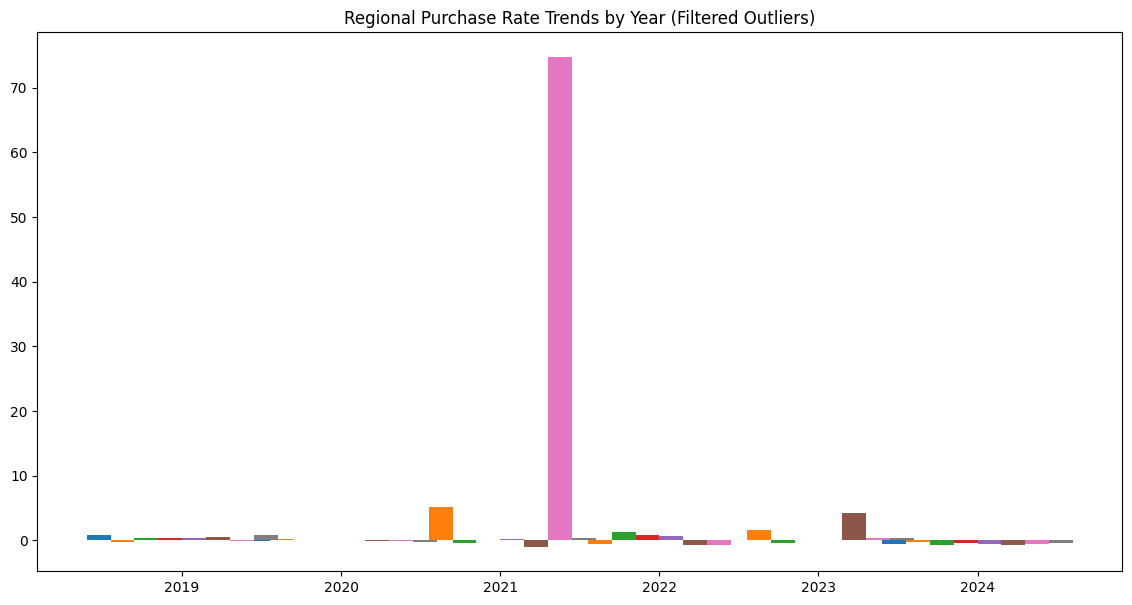

In [6]:
regional_annual_sales = data.groupby(['Territory', 'Year'])['annual_sales'].sum().unstack()

Q1 = regional_annual_sales.quantile(0.25)
Q3 = regional_annual_sales.quantile(0.75)
IQR = Q3 - Q1
filter = (regional_annual_sales >= (Q1 - 1.5 * IQR)) & (regional_annual_sales <= (Q3 + 1.5 * IQR))
regional_annual_sales_filtered = regional_annual_sales[filter].fillna(regional_annual_sales.mean())

regional_purchase_rate = regional_annual_sales_filtered.pct_change(axis=1)

fig, ax = plt.subplots(figsize=(14, 7))
width = 0.15  # the width of the bars
years = regional_purchase_rate.columns
n_regions = len(regional_purchase_rate.index)
for i, region in enumerate(regional_purchase_rate.index):
    ax.bar(years + width*i - width*(n_regions-1)/2, regional_purchase_rate.loc[region], width, label=region)

ax.set_title('Regional Purchase Rate Trends by Year (Filtered Outliers)')
ax.set_xl


/var/folders/sg/qzv2ht5n005_wc213wfx60000000gn/T/ipykernel_94586/767003625.py:7: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  regional_purchase_rate = regional_annual_sales.pct_change(axis=1)


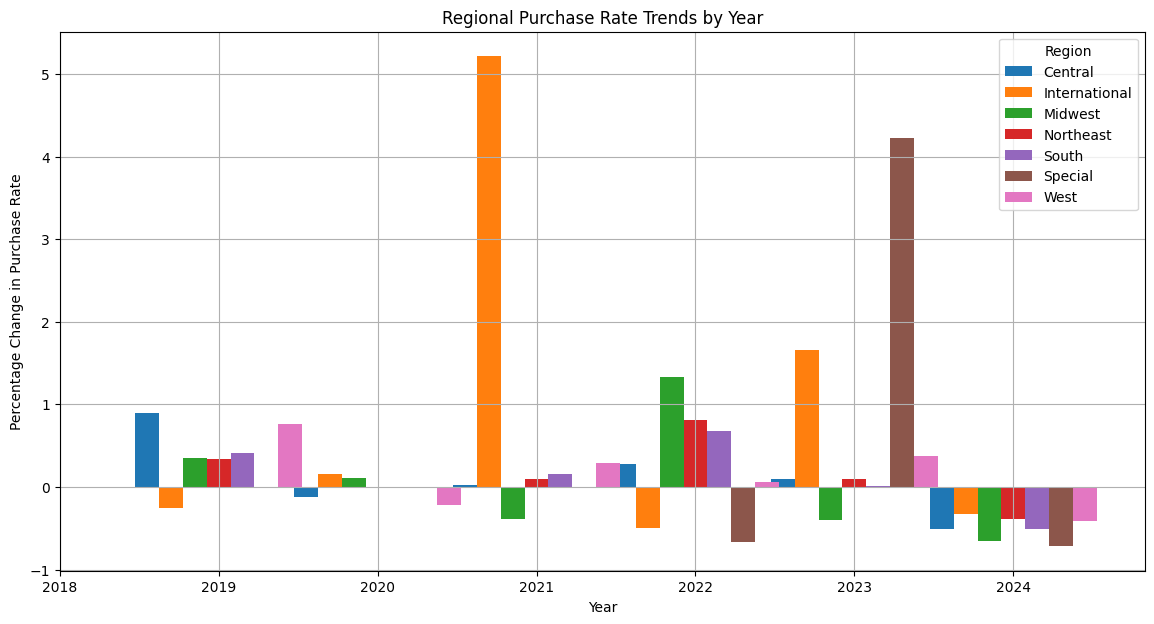

In [11]:
data = data[data['Territory'] != 'Unknown']

regional_annual_sales = data.groupby(['Territory', 'Year'])['annual_sales'].sum().unstack()

regional_purchase_rate = regional_annual_sales.pct_change(axis=1)

fig, ax = plt.subplots(figsize=(14, 7))
width = 0.15  
years = regional_purchase_rate.columns
n_regions = len(regional_purchase_rate.index)
for i, region in enumerate(regional_purchase_rate.index):
    ax.bar(years + width*i - width*(n_regions-1)/2, regional_purchase_rate.loc[region], width, label=region)

ax.set_title('Regional Purchase Rate Trends by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage Change in Purchase Rate')
ax.legend(title='Region')
ax.grid(True)
plt.xticks(ticks=years, labels=years)
plt.show()

/var/folders/sg/qzv2ht5n005_wc213wfx60000000gn/T/ipykernel_94586/715258165.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  regional_purchase_rate = regional_annual_sales.pct_change(axis=1)


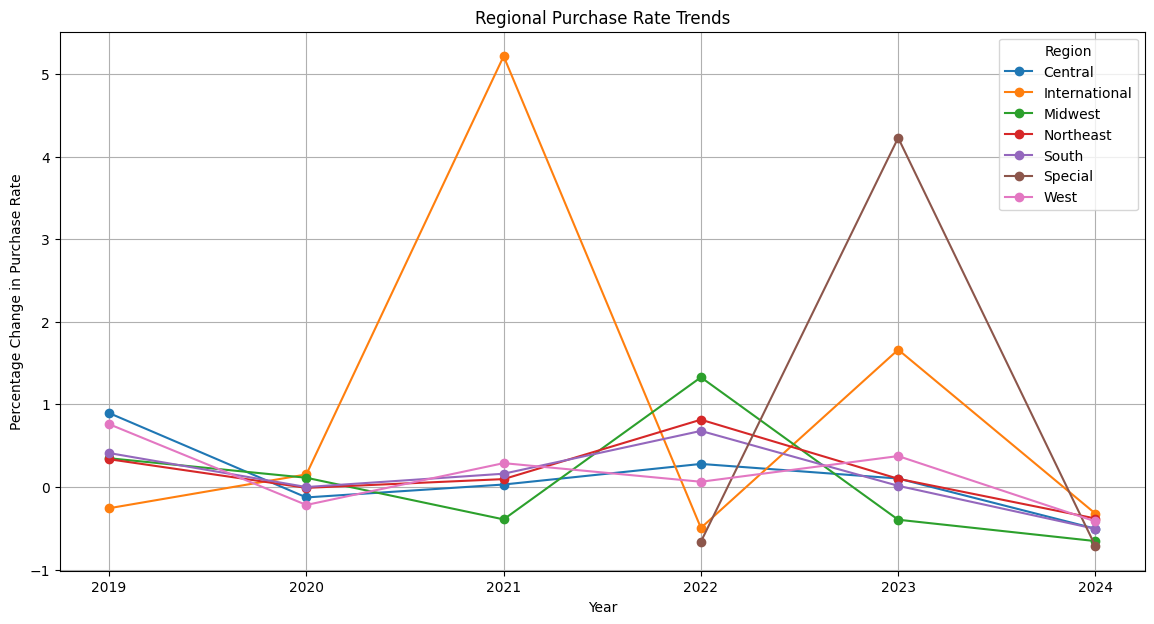

In [13]:
regional_annual_sales = data.groupby(['Territory', 'Year'])['annual_sales'].sum().unstack()
regional_purchase_rate = regional_annual_sales.pct_change(axis=1)

plt.figure(figsize=(14, 7))
for region in regional_purchase_rate.index:
    plt.plot(regional_purchase_rate.columns, regional_purchase_rate.loc[region], marker='o', linestyle='-', label=region)

plt.title('Regional Purchase Rate Trends')
plt.xlabel('Year')
plt.ylabel('Percentage Change in Purchase Rate')
plt.legend(title='Region')
plt.grid(True)
plt.show()
